In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
df = pd.read_csv(r"C:\Users\Aniket Goswami\Downloads\archive\disney_plus_shows.csv")
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
print("Missing values:", df.isna().sum().sort_values(ascending=False).head(10))
print("Sample rows:", df.head())

Shape of dataset: (992, 19)
Columns: ['imdb_id', 'title', 'plot', 'type', 'rated', 'year', 'released_at', 'added_at', 'runtime', 'genre', 'director', 'writer', 'actors', 'language', 'country', 'awards', 'metascore', 'imdb_rating', 'imdb_votes']
Missing values: metascore    700
awards       436
director     303
rated        250
writer       249
runtime      154
language     136
plot         126
country      123
actors       122
dtype: int64
Sample rows:      imdb_id                                       title  \
0  tt0147800                  10 Things I Hate About You   
1  tt7019028                        101 Dalmatian Street   
2  tt0115433                              101 Dalmatians   
3  tt0324941  101 Dalmatians 2: Patch's London Adventure   
4  tt0211181                              102 Dalmatians   

                                                plot    type  rated   year  \
0  A pretty, popular teenager can't go out on a d...   movie  PG-13   1999   
1  This series follows the

In [5]:
# Clean imdb_votes: remove commas and convert to numeric
df['imdb_votes'] = pd.to_numeric(df['imdb_votes'].astype(str).str.replace(',','', regex=False), errors='coerce')

# IMDB Reatings to numeric
df['imdb_rating'] = pd.to_numeric(df['imdb_rating'], errors='coerce')

# Dates to numeric
df['added_at'] = pd.to_datetime(df['added_at'], errors='coerce')
df['released_at'] = pd.to_datetime(df['released_at'], errors='coerce')

#We are only given with release at, so from tg=here we have to extract release year
def extract_year(row):
    if pd.notnull(row['released_at']):
        return int(row['released_at'].year)
    yr = row.get('year', None)
    if pd.isnull(yr):
        return None
    m = re.search(r'(\d{4})', str(yr))
    return int(m.group(1)) if m else None

df['release_year'] = df.apply(extract_year, axis=1)
df['added_year'] = df['added_at'].dt.year

print("\nUnique types:", df['type'].unique())
print("\nRange of release years:", df['release_year'].min(), "to", df['release_year'].max())





Unique types: ['movie' 'series' nan 'episode']

Range of release years: 1929.0 to 2020.0


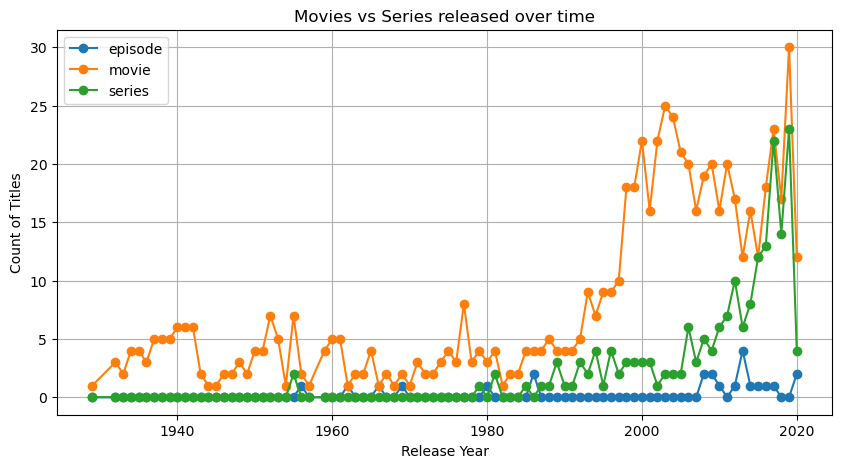


Movies vs Series trend table:
 type          episode  movie  series
release_year                        
1929.0            0.0    1.0     0.0
1932.0            0.0    3.0     0.0
1933.0            0.0    2.0     0.0
1934.0            0.0    4.0     0.0
1935.0            0.0    4.0     0.0
1936.0            0.0    3.0     0.0
1937.0            0.0    5.0     0.0
1938.0            0.0    5.0     0.0
1939.0            0.0    5.0     0.0
1940.0            0.0    6.0     0.0
1941.0            0.0    6.0     0.0
1942.0            0.0    6.0     0.0
1943.0            0.0    2.0     0.0
1944.0            0.0    1.0     0.0
1945.0            0.0    1.0     0.0


In [6]:
#The Data Cleaning Process
type_trend = df.dropna(subset=['release_year','type']).groupby(['release_year','type']).size().reset_index(name='count')
#Here we are dropping the missing release year, as release year in essential and we don't want NA in it
pivot_type = type_trend.pivot(index='release_year', columns='type', values='count').fillna(0)
#Pivoting is used to make the plotting easy
plt.figure(figsize=(10,5))
for col in pivot_type.columns:
    plt.plot(pivot_type.index, pivot_type[col], marker='o', label=col)
plt.title("Movies vs Series released over time")
plt.xlabel("Release Year")
plt.ylabel("Count of Titles")
plt.legend()
plt.grid(True)
plt.show()

print("\nMovies vs Series trend table:\n", pivot_type.head(15))


Average IMDb rating by genre:
 genre
Game-Show      8.300000
Reality-TV     7.544444
News           7.400000
History        7.350000
Documentary    7.192045
Thriller       7.137500
Biography      7.113043
Talk-Show      7.100000
Short          7.072519
Mystery        6.962500
Animation      6.918478
Action         6.758108
Adventure      6.703343
Fantasy        6.687552
Sci-Fi         6.665359
Musical        6.605691
Drama          6.533908
Family         6.533384
Comedy         6.486290
Western        6.470588
Sport          6.462500
Horror         6.400000
Romance        6.291304
Crime          6.079167
War            6.025000
Music          5.825581
Name: imdb_rating, dtype: float64


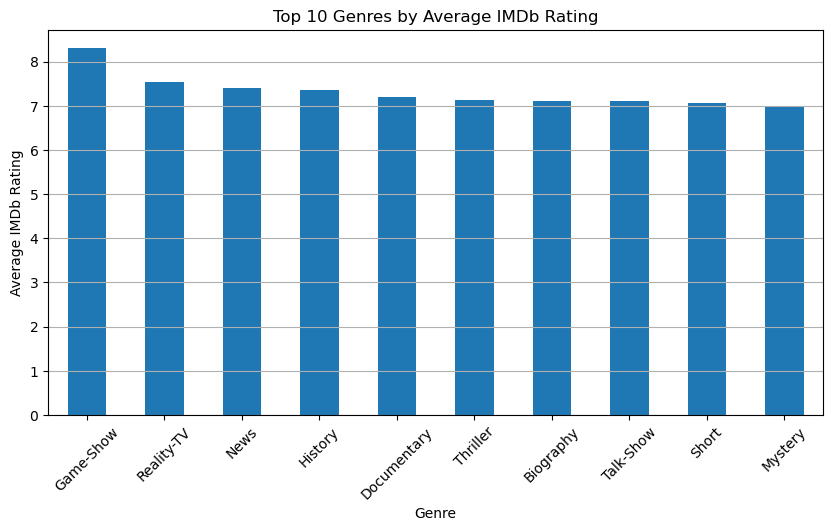

In [7]:
#We will now define the ratings by genre
df_genre = df[['title','release_year','genre','imdb_rating']].dropna(subset=['genre','release_year','imdb_rating']).copy()
df_genre['genre'] = df_genre['genre'].str.split(',')
df_genre = df_genre.explode('genre')
df_genre['genre'] = df_genre['genre'].str.strip()
genre_ratings = df_genre.groupby('genre')['imdb_rating'].mean().sort_values(ascending=False)

print("\nAverage IMDb rating by genre:\n", genre_ratings)

top10_genres = genre_ratings.head(10)

plt.figure(figsize=(10,5))
top10_genres.plot(kind='bar')
plt.title("Top 10 Genres by Average IMDb Rating")
plt.ylabel("Average IMDb Rating")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



Average IMDb rating by type:
 type
episode    7.005556
series     6.914595
movie      6.576479
Name: imdb_rating, dtype: float64


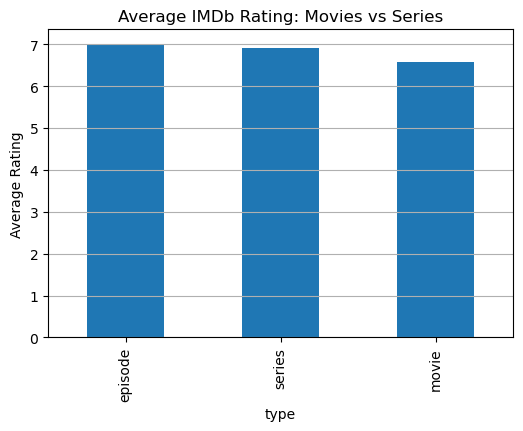

In [8]:
# Combining the above two concepts and graphs
# Average rating per type
type_ratings = df.groupby('type')['imdb_rating'].mean().dropna().sort_values(ascending=False)
print("\nAverage IMDb rating by type:\n", type_ratings)

plt.figure(figsize=(6,4))
type_ratings.plot(kind='bar')
plt.title("Average IMDb Rating: Movies vs Series")
plt.ylabel("Average Rating")
plt.grid(axis='y')
plt.show()
